In [1]:
from math import sin,cos,tan,asin,acos,atan,pi,e,log,sqrt
import numpy as np
import sympy as sy
from sympy import *
from sympy.vector import *

mm=0.001
G=1e9

In [2]:
#知识重点
    #4.1
    #4.2
    
    #0.注意内力应变方向与符号
    #1.弹性系数←弹性模量    k=E*S/L 简化公式
    #2.温度形变 ε=α·ΔT        应变
    #           δ=α·L·ΔT     形变量
    #           F =α·E·A·ΔT  力
    #           σ=α·E·ΔT     应力

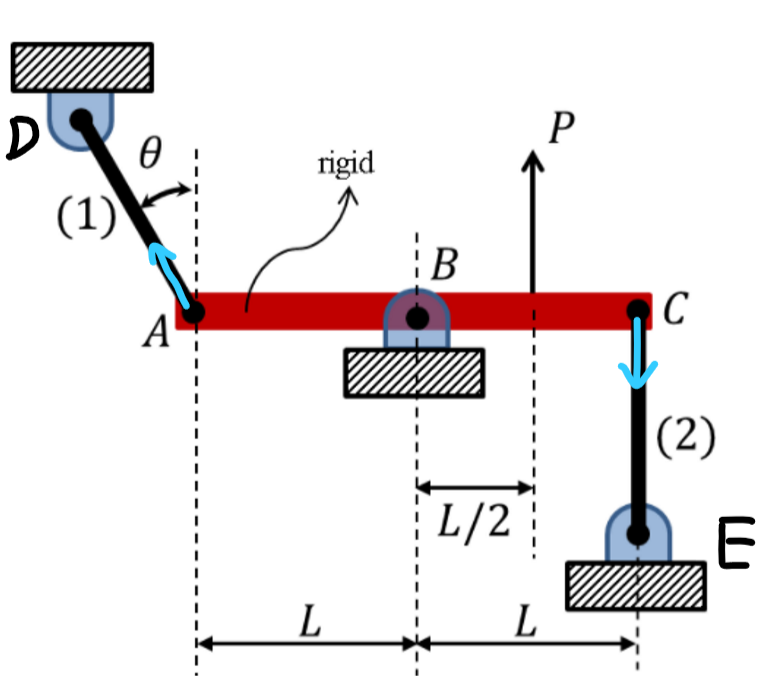

In [3]:
#HW4.1
k1 = 282 # N/mm
k2 = 138 # N/mm
L = 200 # mm
theta = 36 # degrees
P = 20 # N

#标准单位转化
k1=k1/mm
k2=k2/mm
L=L*mm
theta=theta*pi/180
P=P

#根据几何关系，我们知道delta1/delta2=cos(delta_theta)
angle=sy.S('angle')

delta2=L*angle
delta1=delta2*cos(theta) #!!!!这里是theta 不是 angle
fc=k2*delta2
fa=k1*delta1

equm=P*0.5*L-fa*L*cos(theta)-fc*L

angle=sy.solve([equm],[angle])[angle]
L*angle/mm

0.0310008888500049

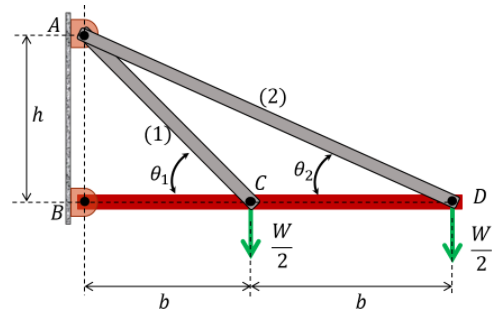

In [4]:
#HW4.2
h = 100 # mm
b = 115 # mm
d = 27 # mm
E1 = 164 # MPa
E2 = 235 # MPa
W = 50 # N

#单位转化
h=h*mm
b=b*mm
d=d*mm
E1=E1*1e6
E2=E2*1e6


theta=S('theta')

C=Matrix([b,0,0])
D=Matrix([2*b,0,0])
A=Matrix([0,h,0])
B=Matrix([0,0,0])

CC=Matrix([b*cos(theta),b*sin(theta),0])
DD=2*CC

AC1=C-A
AC2=CC-A
AD1=D-A
AD2=DD-A

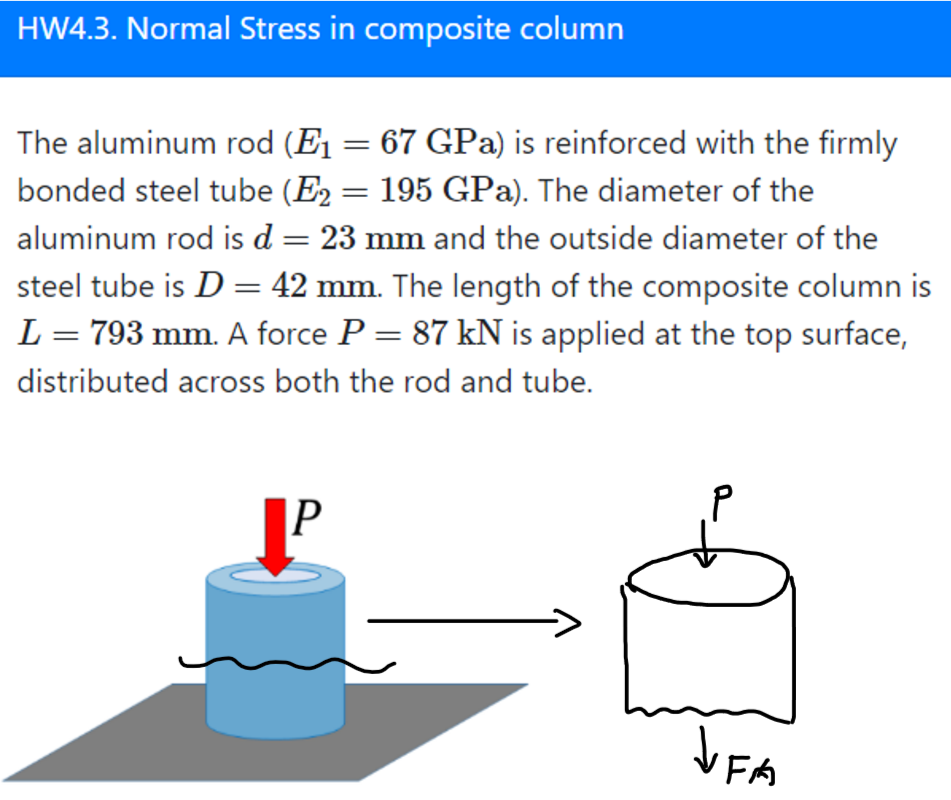

In [6]:
#HW4.3
###################################################################
E1 = 67 # GPa
E2 = 195 # GPa
d = 23 # mm
D = 42 # mm
L = 793 # mm
P = 87 # kN

#单位转化
E1=E1*G
E2=E2*G
d=d*mm
D=D*mm
L=L*mm
P=P*1000

#计算各自面积
s1=pi*(d/2)**2
s2=pi*(D/2)**2-s1
s=pi*(D/2)**2

#计算弹性系数
k1=E1*s1/L
k2=E2*s2/L

#本题假设内外在受力情况下产生相同的形变，所以用P/(k1+k2)计算压缩量
delta_length=P/(k1+k2)
f1=k1*delta_length
f2=k2*delta_length

#这里要加一个 负号######具体原因看上面的示意图######内力默认方向朝截面之外
sigma1=-float(f1/s1)/1000000
sigma2=-float(f2/s2)/1000000

print('rod ',sigma1)
print('tube',sigma2)

rod  -26.864180094188477
tube -78.18679281144408


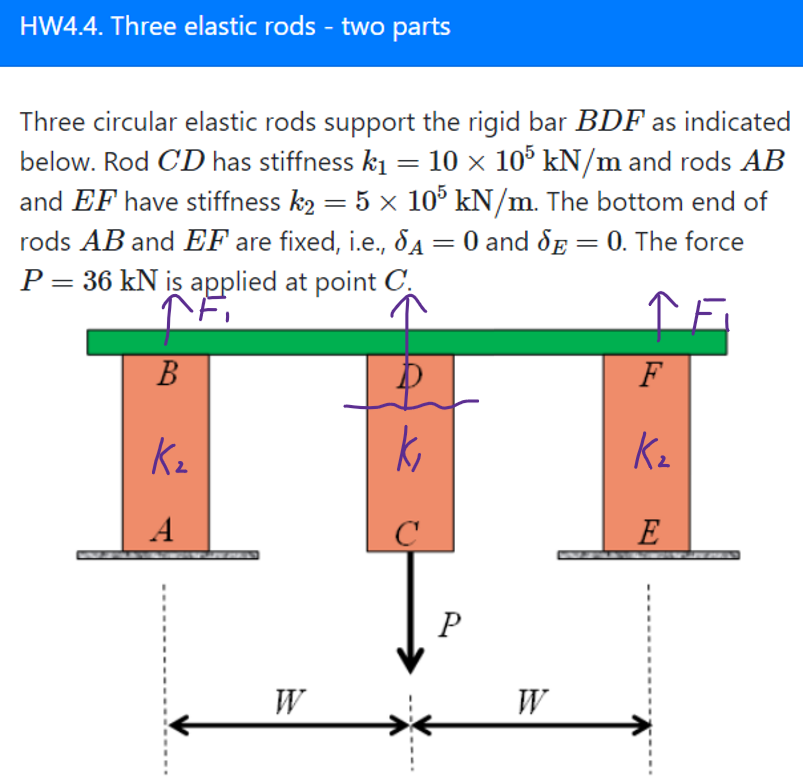

In [7]:
#HW4.4
##########################################
k1 = 900000 # kN/m
k2 = 600000 # kN/m
P = 48 # kN

#单位转化
k1 = k1*1000
k2 = k2*1000
P = P*1000


f1=0.5*P
delta1=f1/k2
delta2=P/k1

deltaB=delta1/mm
deltaC=(delta2+delta1)/mm

print(deltaB,deltaC)

0.04 0.09333333333333334


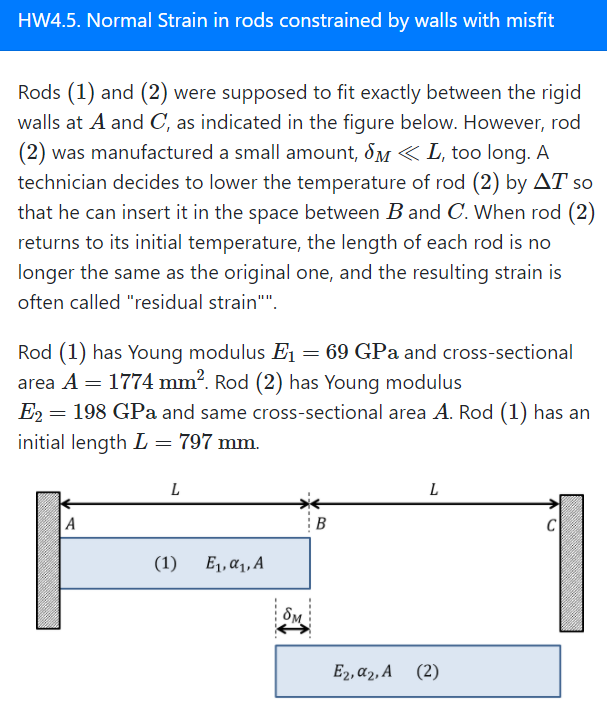
#计算 rod1 rod2的应变

In [8]:
#HW4.5
##########################################
E1 = 69 # GPa
E2 = 201 # GPa
A = 1734 # mm^2
L = 764 # mm
deltaM = 0.5 # mm

#单位转化
E1=E1*G
E2=E2*G
A=A*mm*mm
L=L*mm
deltaM=deltaM*mm

#弹性模量→弹性系数
k1=E1*A/L
k2=E2*A/L

#解方程
f1,f2=S('f1,f2')
equ1=f1-f2
equ2=f1/k1+f2/k2-deltaM
f=sy.solve([equ1,equ2],[f1,f2])
f1=f[f1]
f2=f[f2]

#计算应变
delta=-f1/k1
epsilon=delta/L
print('rod1',epsilon*1000)
print('rod2',-f2/k2/L*1000)

rod1 -0.487201861547411
rod2 -0.167248400232693


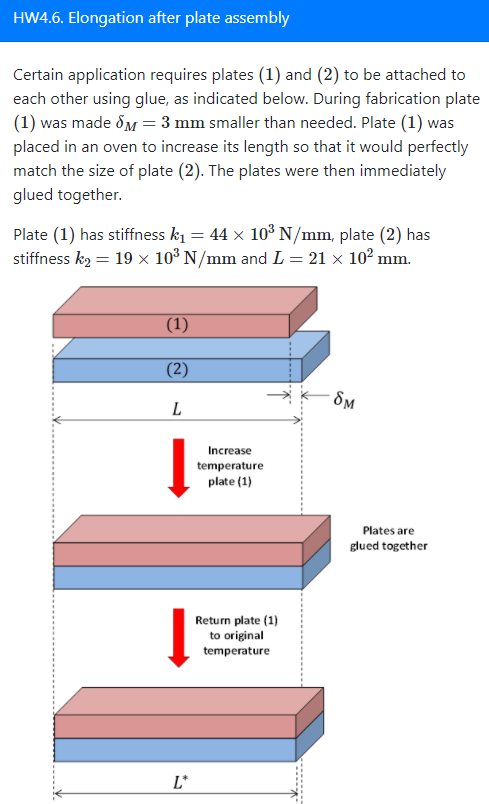
#分别求出两条rod的应变

In [9]:
#4.6
#########################################
deltaM = 2 # mm
k1 = 45000 # N/mm
k2 = 13000 # N/mm
L = 2200 # mm

#单位换算
deltaM*=mm
L*=mm

delta=S('delta')

f1=k1*(deltaM-delta)
f2=k2*delta
equ1=f1-f2

delta=sy.solve([equ1],[delta])[delta]

strain1=(deltaM-delta)/(L-deltaM)*1000
strain2=-delta/L*1000

print('rod1',strain1)
print('rod2',strain2)

rod1 0.203947161996800
rod2 -0.705329153605016


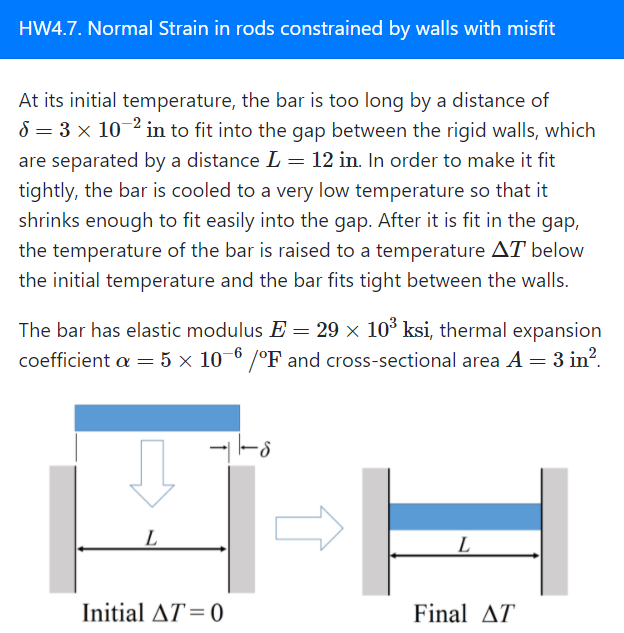
#计算正应力

In [10]:
#HW4.7
#######################################
delta = 0.03 # in
L = 12 # in
E = 29000 # ksi
alpha = 0.000005 # /degrees F
A = 3 # in^2
dT = -150 # degrees F

#单位转化
E=E*1000

#压缩长度=已知压缩长度+因温度而压缩的长度
delta_length_T=alpha*L*dT
delta_total=delta+delta_length_T

#弹性模量→弹性系数
k=E*A/L

#计算力的大小 F=k·Δx
f=k*delta_total
sigma=-f/A/1000

print(sigma)

-50.74999999999999


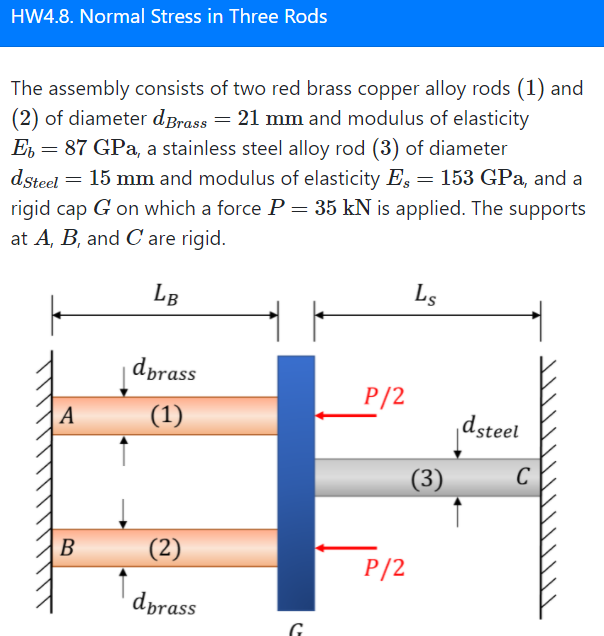
#分别计算3个rod的正应力

In [11]:
#HW4.8
#########################################
dBrass = 21 # mm
dSteel = 15 # mm
Ls = 765 # mm
Lb = 786 # mm
Es = 153 # GPa
Eb = 87 # GPa
P = 35 # kN

dBrass*=mm
dSteel*=mm
Ls*=mm
Lb*=mm
Es*=G
Eb *=G
P*=1000

#面积
s1=pi*(dBrass/2)**2
s2=pi*(dSteel/2)**2

#弹性模量→弹性系数
kb=Eb*s1/Lb
ks=Es*s2/Ls

delta=S('delta')

f_left=kb*2*delta
f_right=+ks*delta-P
equ=f_left+f_right

delta=sy.solve([equ],[delta])[delta]


sigma1=(delta*kb/s1/1000000)
sigma2=-delta*ks/s2/1000000

print(sigma1,sigma2)

34.5840863280398 -62.4898663306650
